In [16]:
# Update CUDA for TF 2.5
!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64/libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
!dpkg -i libcudnn8_8.1.0.77-1+cuda11.2_amd64.deb
# Check if package has been installed
!ls -l /usr/lib/x86_64-linux-gnu/libcudnn.so.*
# Upgrade Tensorflow
#!pip install --upgrade tensorflow==2.5.0 #ist schon installiert

SyntaxError: invalid syntax (2850074560.py, line 2)

In [1]:
#Install Mask R-CNN
#!wget https://pysource.com/extra_files/maskrcnn_colab_demo_commit_17.zip
#!unzip maskrcnn_colab_demo_commit_17.zip #Wichtig!!!
import sys
#sys.path.append('D:/Projektseminar/PJS_SS_22_KI_Materialbedarfsplanung/synthetic_data/TF Object Detection/maskrcnn_colab/mrcnn_demo') #trainiertes Modell liegt hier: "D:\content\maskrcnn_colab\mask_rcnn_coco.h5"
from m_rcnn import *
%matplotlib inline

VERS 0.4 - updated 04/08/2022


In [5]:
!nvidia-smi #Grafikkarten Statistiken


Invalid combination of input arguments. Please run 'nvidia-smi -h' for help.



In [2]:
#Check for Grafikkarte
import tensorflow as tf
len(tf.config.list_physical_devices('GPU'))>0

True

In [3]:
import tensorflow as tf; print(tf.__version__)

2.9.1


2. Image Dataset

In [2]:
# Extract Images
images_path = 'D:/Projektseminar/PJS_SS_22_KI_Materialbedarfsplanung/synthetic_data/TF Object Detection/TrainSet'            #'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/TrainSet'
annotations_path = 'D:/Projektseminar/PJS_SS_22_KI_Materialbedarfsplanung/synthetic_data/TF Object Detection/annotations.json'                                           #'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/annotations.json'

#extract_images(os.path.join("/content/",images_path), "/content/dataset") #Extracting nur wegen Colab Eigenheit, kann hier noch geändert werden

In [4]:
#dataset_train = load_image_dataset(os.path.join('C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung', annotations_path), 'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/TrainSet', "train")
dataset_train = load_image_dataset(annotations_path, 'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/TrainSet', "train")
#dataset_val = load_image_dataset(os.path.join('C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung', annotations_path), 'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/TrainSet', "val")
dataset_val = load_image_dataset(annotations_path, 'C:/Users/bened/OneDrive - Universität Würzburg/PJS - Intern/Measure Object Size/Objekterkennung/TrainSet', "val")
class_number = dataset_train.count_classes()
print('Train: %d' % len(dataset_train.image_ids))
print('Validation: %d' % len(dataset_val.image_ids))
print("Classes: {}".format(class_number))

Annotation json path:  D:/Projektseminar/PJS_SS_22_KI_Materialbedarfsplanung/synthetic_data/TF Object Detection/annotations.json
Annotation json path:  D:/Projektseminar/PJS_SS_22_KI_Materialbedarfsplanung/synthetic_data/TF Object Detection/annotations.json
Train: 20
Validation: 2
Classes: 1


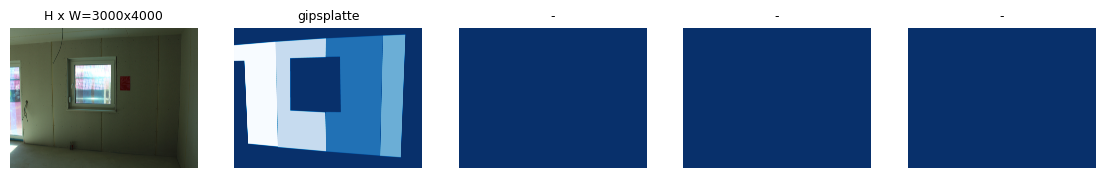

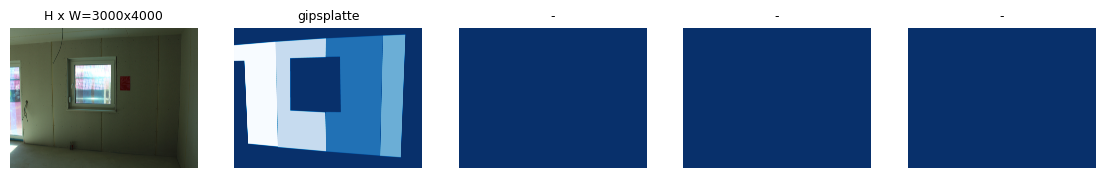

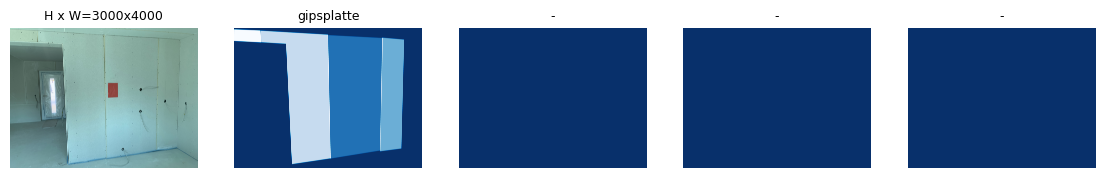

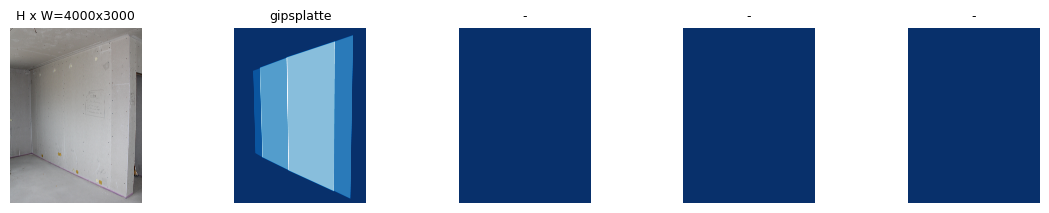

In [6]:
# Load image samples
display_image_samples(dataset_train)

## Training

In [5]:
# Load Configuration
config = CustomConfig(class_number)
# config.display()
model = load_training_model(config)

D:\Projektseminar\PJS_SS_22_KI_Materialbedarfsplanung\synthetic_data\TF Object Detection\mask_rcnn_coco.h5


In [11]:
import tensorflow as tf
physical_devices=tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [6]:
# Start Training
# This operation might take a long time.
train_head(model, dataset_train, dataset_train, config)
#Fehlermeldung: "Canceled future for execute_request message before replies were done"


Starting at epoch 0. LR=0.001

Checkpoint Path: D:\Projektseminar\PJS_SS_22_KI_Materialbedarfsplanung\synthetic_data\TF Object Detection\logs\object20220822T1530\mask_rcnn_object_{epoch:04d}.h5
Selecting layers to train
fpn_c5p5               (Conv2D)
fpn_c4p4               (Conv2D)
fpn_c3p3               (Conv2D)
fpn_c2p2               (Conv2D)
fpn_p5                 (Conv2D)
fpn_p2                 (Conv2D)
fpn_p3                 (Conv2D)
fpn_p4                 (Conv2D)
rpn_model              (Functional)
mrcnn_mask_conv1       (TimeDistributed)
mrcnn_mask_bn1         (TimeDistributed)
mrcnn_class_conv1      (TimeDistributed)
mrcnn_class_bn1        (TimeDistributed)
mrcnn_mask_conv2       (TimeDistributed)
mrcnn_mask_bn2         (TimeDistributed)
mrcnn_class_conv2      (TimeDistributed)
mrcnn_class_bn2        (TimeDistributed)
mrcnn_mask_conv3       (TimeDistributed)
mrcnn_mask_bn3         (TimeDistributed)
mrcnn_bbox_fc          (TimeDistributed)
mrcnn_mask_conv4       (TimeDistribu

KeyboardInterrupt: 

**4. Detection (test your model on a random image)**

In [7]:
# Load Test Model
# The latest trained model will be loaded
test_model, inference_config = load_test_model(class_number)

Instructions for updating:
Use fn_output_signature instead


FileNotFoundError: [Errno 2] Could not find weight files in D:\Projektseminar\PJS_SS_22_KI_Materialbedarfsplanung\synthetic_data\TF Object Detection\logs\object20220822T1530

original_image           shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
Trained model result
Processing 1 images
image                    shape: (512, 512, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 512, 512, 3)      min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max:  512.00000  int32
anchors                  shape: (1, 65472, 4)         min:   -0.70849  max:    1.58325  float32
Annotation


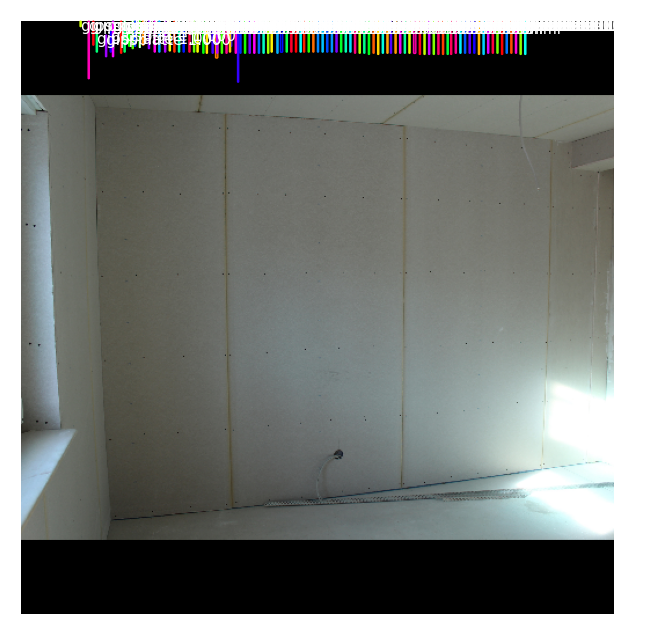

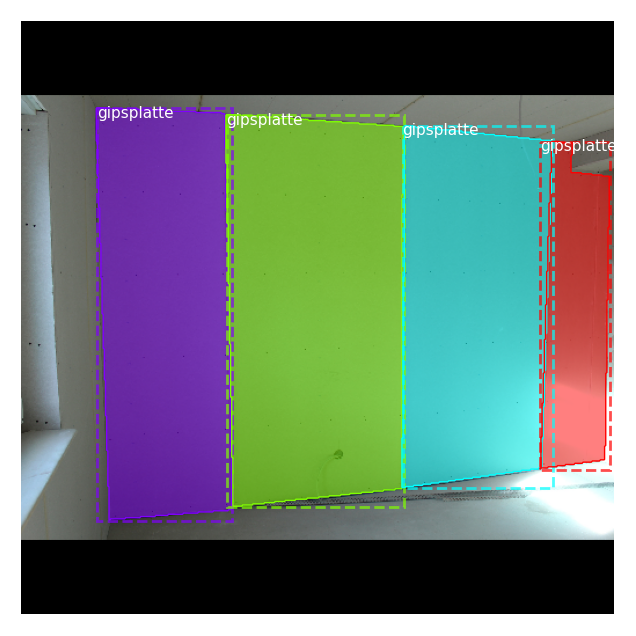

In [10]:
# Test on a random image
test_random_image(test_model, dataset_val, inference_config)